# MA 336 - Final Project
Name: Virendrasinh Narendrasinh Chavda </br>
Registration Number: 2315880 </br>
Topic: Using machine learning techniques for a regression problem

# Introduction

In many countries like India, used car market is bigger than new car market [1]. Conventionally, buyers either buy directly from owners or through garages and resellers. But with growing number of internet users and ease of finding large options at finger tips, digital players such as Cardekho, Cars24, etc. are growing rapidly. Cardekho is one of the most reliable platform for sellers and buyers of old cars, as it has manhy features to help sellers and buyers to arrive at any decision. One such feature is price prediction of used car. When a car owner enters a few details of their used car on Cardekho, they will get an expected selling price for their car. This expected value is calculated using machine learning algorithms which are trained on data from thousands of previously sold cars. </br>
This prediction of expected selling price is intriguing and helps the seller to set a realistic selling price. Hence it becomes important to study how machine learning algorithms can be used for such applications. For this study, a dataset from kaggle has been used, which can be found on following link: </br>
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho </br>
This dataset has 4 csv files, out of which "car details v4.csv" has been used for this project as it has more features/columns compared to other csv files, hence more information. </br>
In this project, different machine learning algorithms are used to see how accurately they can predict selling price of any car and how they can be tuned to give better results. Moreover, how can different techniques be used for dimensionality reduction/feature selection. Lastly, a simple ANN is trained on the same dataset and tuned and its results are discussed.  

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn.metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, LeaveOneOut
from sklearn.model_selection import cross_validate
from scikeras.wrappers import KerasRegressor

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from sklearn.linear_model import Lasso
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.display.max_columns = None

In [288]:
df = pd.read_csv('cardekho_data.csv')
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [290]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [292]:
df.rename(columns={"Fuel Type": "Fuel_Type", "Seller Type": "Seller_Type", "Max Power": "Max_Power",
                   "Max Torque": "Max_Torque", "Seating Capacity": "Seating_Capacity",
                   "Fuel Tank Capacity": "Fuel_Tank_Capacity"}, inplace = True)

In [293]:
df.duplicated().sum()

0

In [294]:
df.isna().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel_Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller_Type             0
Engine                 80
Max_Power              80
Max_Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating_Capacity       64
Fuel_Tank_Capacity    113
dtype: int64

In [295]:
null_count = df.isna().sum(axis = 1)
error_data = null_count[null_count > 5]
error_data

33      9
69      9
94      9
108     9
138     9
       ..
1898    9
1903    9
1928    9
2009    9
2025    9
Length: 64, dtype: int64

In [296]:
df.drop(error_data.index, inplace = True)
df.reset_index(drop = True, inplace = True)
df

,Make,Model,Price,Year,Kilometer,Fuel_Type,Transmission,Location,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
1991,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
1992,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
1993,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


<Axes: >

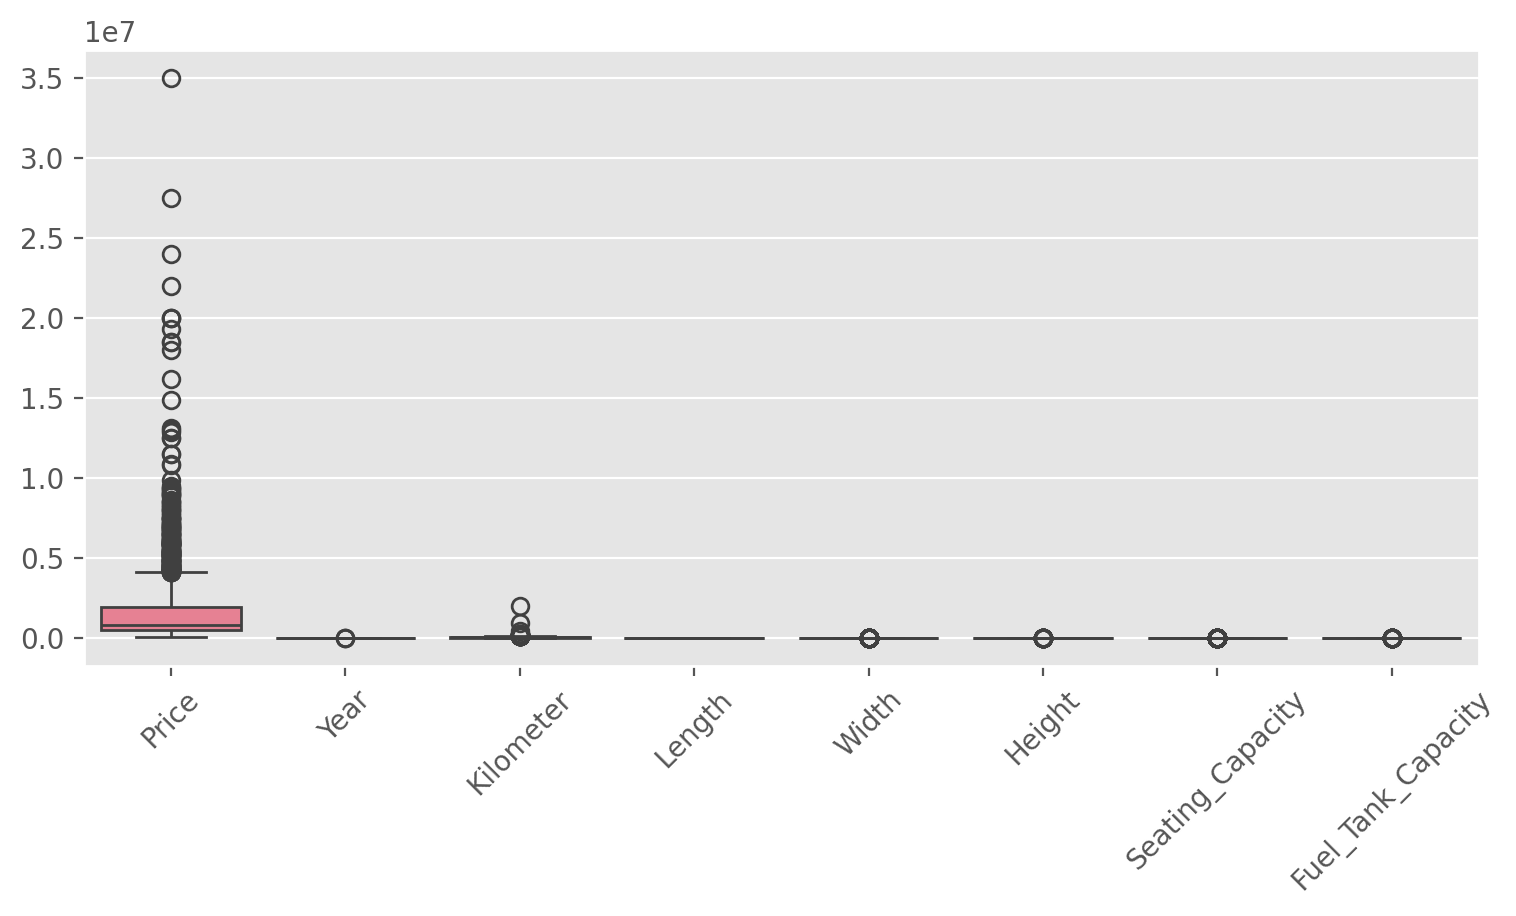

In [297]:
plt.figure(figsize = (9,4), dpi = 200)
plt.xticks(rotation = 45)
sns.boxplot(data = df)

In [298]:
for item in df:
    if df[item].isna().sum() > 0:
        if df[item].dtypes == 'O':
            df[item].fillna(df[item].mode()[0], inplace = True)
        else:
            df[item].fillna((df[item].median()), inplace = True)

In [299]:
df.isna().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel_Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller_Type           0
Engine                0
Max_Power             0
Max_Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating_Capacity      0
Fuel_Tank_Capacity    0
dtype: int64

In [300]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel_Type,Transmission,Location,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [301]:
df['Engine'] = df['Engine'].str.replace('cc','')
df['Max_Power'] = df['Max_Power'].str.replace('bhp','')
df['Max_Power'] = df['Max_Power'].str.replace(' ','')
df['Max_Power'] = df['Max_Power'].str.replace('rpm','')
df['Max_Torque'] = df['Max_Torque'].str.replace('Nm','')
df['Max_Torque'] = df['Max_Torque'].str.replace(' ','')
df['Max_Torque'] = df['Max_Torque'].str.replace('rpm','')

df.head(5)

,Make,Model,Price,Year,Kilometer,Fuel_Type,Transmission,Location,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198,87@6000,109@4500,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248,74@4000,190@2000,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197,79@6000,112.7619@4000,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197,82@6000,113@4200,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393,148@3400,343@1400,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [302]:
for i in df:
    print(str(i) + " : " + str(df[i].nunique()))

Make : 33
Model : 1012
Price : 610
Year : 18
Kilometer : 817
Fuel_Type : 8
Transmission : 2
Location : 76
Color : 17
Owner : 6
Seller_Type : 3
Engine : 108
Max_Power : 321
Max_Torque : 273
Drivetrain : 3
Length : 248
Width : 170
Height : 196
Seating_Capacity : 6
Fuel_Tank_Capacity : 55


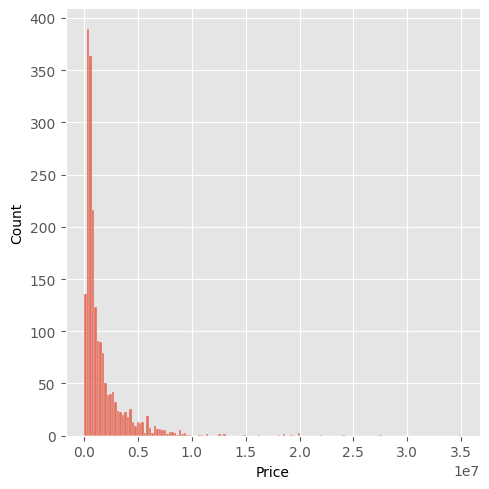

In [303]:
# Checking the distribution
sns.displot(df, x="Price")

### Data Transformation

In [304]:
df["Owner"].unique()

array(['First', 'Second', 'Third', 'Fourth', 'UnRegistered Car',
       '4 or More'], dtype=object)

In [305]:
for value in range(len(df["Owner"])):
    if df["Owner"][value] == '4 or More':
        df["Owner"][value] = 'Fourth'
        
df["Owner"].unique()

array(['First', 'Second', 'Third', 'Fourth', 'UnRegistered Car'],
      dtype=object)

In [306]:
cols_to_transform = ['Make', 'Model', 'Fuel_Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller_Type',
                     'Engine', 'Max_Power', 'Max_Torque', 'Drivetrain', 'Year']

In [307]:
# # one hot encoding

# import category_encoders as ce
  
# #Create object for one-hot encoding
# encoder=ce.OneHotEncoder(cols=cat_columns,return_df=True,use_cat_names=True)

# #Fit and transform Data
# data_encoded = encoder.fit_transform(new[cat_columns])

# # Merge with main 
# new = new.join(enc_data) 

# new

In [308]:
# ordinal encoding

from sklearn.preprocessing import OrdinalEncoder 
enc = OrdinalEncoder()
df[cols_to_transform] = enc.fit_transform(df[cols_to_transform])

df

,Make,Model,Price,Year,Kilometer,Fuel_Type,Transmission,Location,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,7.0,99.0,505000,12.0,87150,6.0,1.0,56.0,7.0,0.0,1.0,7.0,299.0,5.0,1.0,3990.0,1680.0,1505.0,5.0,35.0
1,19.0,773.0,450000,9.0,75000,2.0,1.0,40.0,15.0,2.0,2.0,9.0,277.0,74.0,1.0,3995.0,1695.0,1555.0,5.0,42.0
2,8.0,994.0,220000,6.0,67000,6.0,1.0,39.0,8.0,0.0,2.0,6.0,288.0,10.0,1.0,3585.0,1595.0,1550.0,5.0,35.0
3,30.0,474.0,799000,14.0,37500,6.0,1.0,41.0,13.0,0.0,2.0,6.0,292.0,15.0,1.0,3995.0,1745.0,1510.0,5.0,37.0
4,30.0,530.0,1950000,13.0,69000,2.0,1.0,45.0,7.0,0.0,2.0,60.0,75.0,158.0,2.0,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,18.0,965.0,850000,11.0,90300,2.0,1.0,66.0,15.0,0.0,2.0,55.0,63.0,154.0,1.0,4585.0,1890.0,1785.0,7.0,70.0
1991,8.0,397.0,275000,9.0,83000,6.0,1.0,1.0,15.0,2.0,2.0,103.0,241.0,250.0,1.0,3495.0,1550.0,1500.0,5.0,32.0
1992,6.0,438.0,240000,8.0,73000,6.0,1.0,67.0,14.0,0.0,2.0,5.0,271.0,1.0,1.0,3795.0,1680.0,1427.0,5.0,45.0
1993,1.0,11.0,4290000,13.0,60474,2.0,0.0,12.0,15.0,0.0,2.0,47.0,139.0,188.0,2.0,4936.0,1868.0,1479.0,5.0,65.0


<Axes: >

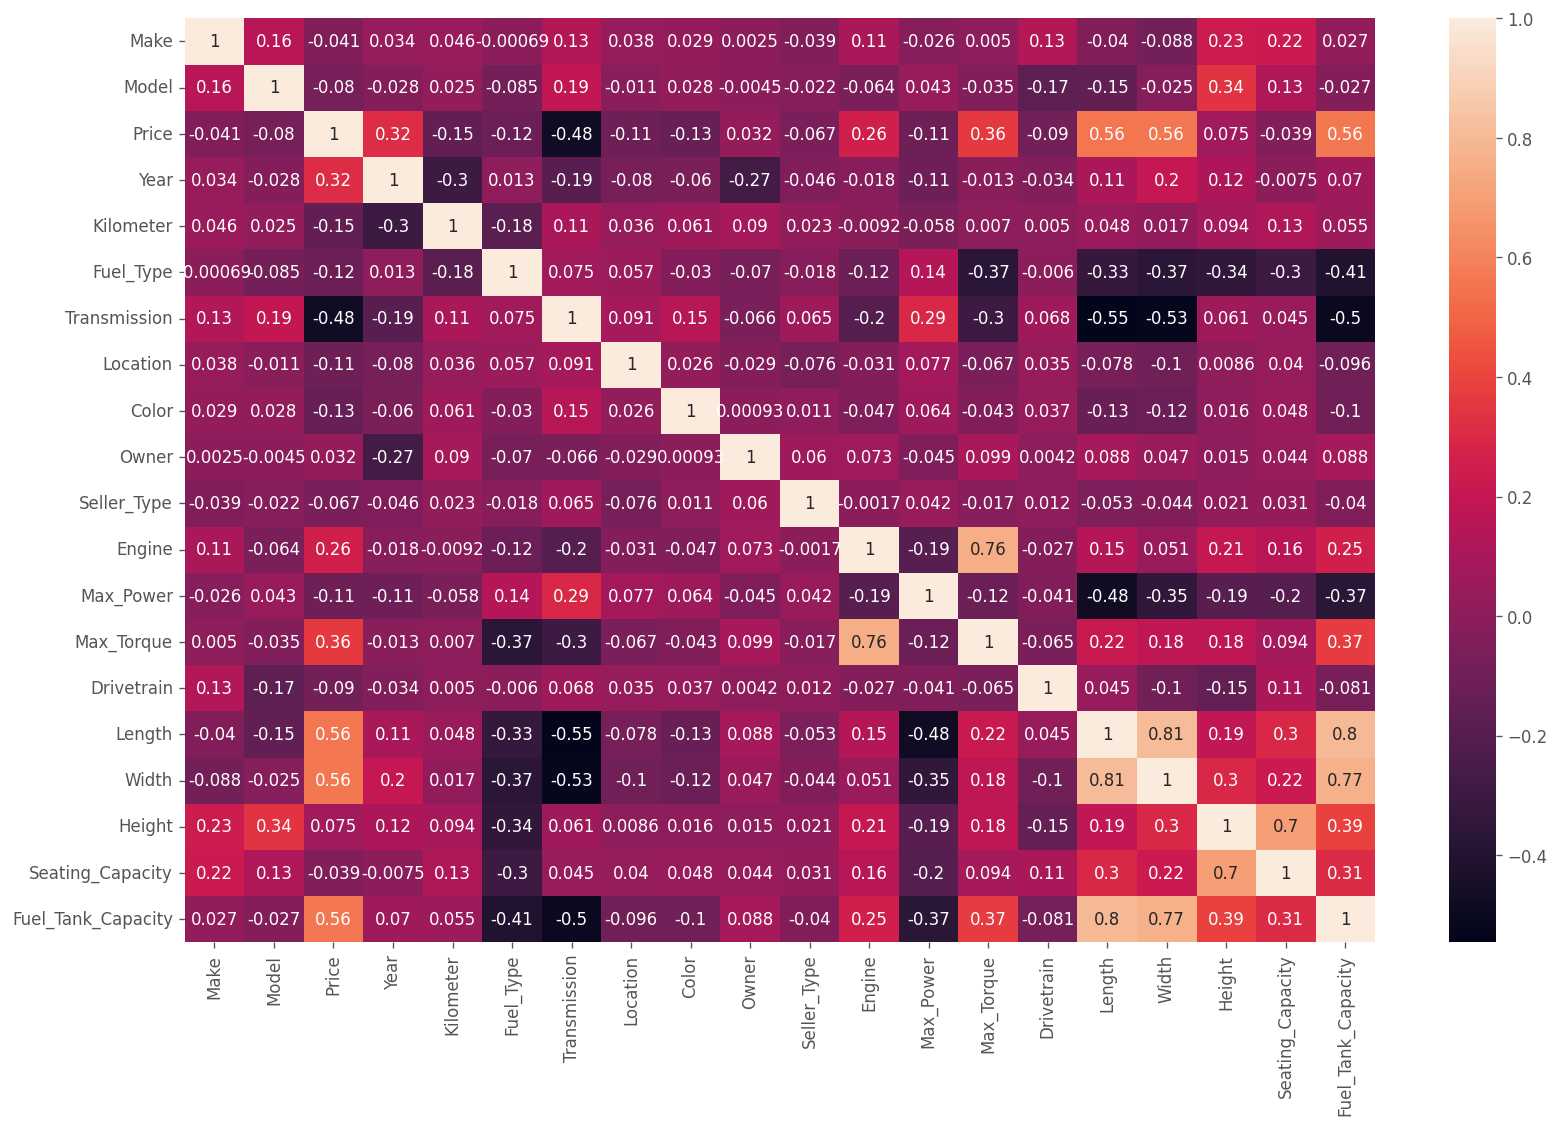

In [309]:
plt.figure(figsize = (16,10), dpi = 120)
sns.heatmap(df.corr(), annot = True)

In [310]:
X = df.drop('Price', axis = 1)
Y = df[['Price']]

In [311]:
from sklearn.preprocessing import MinMaxScaler

def min_max_function(features, target):
    scaler1 = MinMaxScaler()
    scaler2 = MinMaxScaler()

    scale_columns1 = features.columns
    scale_columns2 = target.columns

    features[scale_columns1] = scaler1.fit_transform(features[scale_columns1])
    target[scale_columns2] = scaler2.fit_transform(target[scale_columns2])

In [312]:
min_max_function(X, Y)

In [313]:
X

,Make,Model,Year,Kilometer,Fuel_Type,Transmission,Location,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,0.21875,0.097923,0.705882,0.043575,0.857143,1.0,0.746667,0.4375,0.0,0.5,0.065421,0.934375,0.018382,0.5,0.360729,0.275168,0.409639,0.500000,0.222222
1,0.59375,0.764590,0.529412,0.037500,0.285714,1.0,0.533333,0.9375,0.5,1.0,0.084112,0.865625,0.272059,0.5,0.362753,0.295302,0.469880,0.500000,0.300000
2,0.25000,0.983185,0.352941,0.033500,0.857143,1.0,0.520000,0.5000,0.0,1.0,0.056075,0.900000,0.036765,0.5,0.196761,0.161074,0.463855,0.500000,0.222222
3,0.93750,0.468843,0.823529,0.018750,0.857143,1.0,0.546667,0.8125,0.0,1.0,0.056075,0.912500,0.055147,0.5,0.362753,0.362416,0.415663,0.500000,0.244444
4,0.93750,0.524233,0.764706,0.034500,0.285714,1.0,0.600000,0.4375,0.0,1.0,0.560748,0.234375,0.580882,1.0,0.662348,0.476510,0.759036,0.833333,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,0.56250,0.954500,0.647059,0.045150,0.285714,1.0,0.880000,0.9375,0.0,1.0,0.514019,0.196875,0.566176,0.5,0.601619,0.557047,0.746988,0.833333,0.611111
1991,0.25000,0.392681,0.529412,0.041500,0.857143,1.0,0.013333,0.9375,0.5,1.0,0.962617,0.753125,0.919118,0.5,0.160324,0.100671,0.403614,0.500000,0.188889
1992,0.18750,0.433234,0.470588,0.036500,0.857143,1.0,0.893333,0.8750,0.0,1.0,0.046729,0.846875,0.003676,0.5,0.281781,0.275168,0.315663,0.500000,0.333333
1993,0.03125,0.010880,0.764706,0.030237,0.285714,0.0,0.160000,0.9375,0.0,1.0,0.439252,0.434375,0.691176,1.0,0.743725,0.527517,0.378313,0.500000,0.555556


In [314]:
Y

,Price
0,0.013047
1,0.011473
2,0.004893
3,0.021459
4,0.054390
...,...
1990,0.022918
1991,0.006466
1992,0.005465
1993,0.121341


### Deciding number of folds for cross validation

In [315]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [316]:
# Creating a function for running models with cross validation

def run_model(model, k_num, feature, label):
    kf = KFold(n_splits=k_num, shuffle=True, random_state=10)
    regressor = model
    scoring = ['neg_mean_absolute_error', 'r2']
    scores = cross_validate(regressor, feature, label, scoring=scoring, cv = kf)
    return np.mean(scores['test_neg_mean_absolute_error']) , np.mean(scores['test_r2'])

In [317]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

for k in range(2, 26):
    mean_mae, mean_r2 = run_model(LR, k, X, Y)
    print("For fold " + str(k) + ": mean absolute error : " + str(round(mean_mae, 5))
          + " : r^2 : " + str(round(mean_r2, 5)))

For fold 2: mean absolute error : -0.02637 : r^2 : 0.52522
For fold 3: mean absolute error : -0.0262 : r^2 : 0.49015
For fold 4: mean absolute error : -0.02574 : r^2 : 0.54866
For fold 5: mean absolute error : -0.0259 : r^2 : 0.53326
For fold 6: mean absolute error : -0.02578 : r^2 : 0.52859
For fold 7: mean absolute error : -0.02563 : r^2 : 0.55399
For fold 8: mean absolute error : -0.02572 : r^2 : 0.53852
For fold 9: mean absolute error : -0.02578 : r^2 : 0.54097
For fold 10: mean absolute error : -0.02574 : r^2 : 0.54019
For fold 11: mean absolute error : -0.02563 : r^2 : 0.55144
For fold 12: mean absolute error : -0.02577 : r^2 : 0.53781
For fold 13: mean absolute error : -0.02568 : r^2 : 0.5455
For fold 14: mean absolute error : -0.0256 : r^2 : 0.55764
For fold 15: mean absolute error : -0.02564 : r^2 : 0.55347
For fold 16: mean absolute error : -0.0257 : r^2 : 0.54504
For fold 17: mean absolute error : -0.02567 : r^2 : 0.54412
For fold 18: mean absolute error : -0.02556 : r^2 : 0

In [318]:
# Ideal error
loo_scoring = ['neg_mean_absolute_error', 'r2']
ideal_scores = cross_validate(LR, X, Y, scoring=loo_scoring, cv = LeaveOneOut())
ideal_error = np.mean(ideal_scores['test_neg_mean_absolute_error'])
ideal_r2 = np.mean(ideal_scores['test_r2'])
print("Ideal error : " + str(round(ideal_error, 5)) + " : ideal r2: " + str(round(ideal_r2, 5)))

Ideal error : -0.02549 : ideal r2: nan


### Linear Regression

In [319]:
n_folds = 9

# Number of Folds and adding the random state for replication
folds = KFold(n_splits = n_folds,shuffle = True, random_state = 2)

In [320]:
def linear_regression(feature, target):
    regressor = LinearRegression()
    LR_mae, LR_r2 = run_model(regressor, n_folds, feature, target)
    return round(LR_mae , 3), round(LR_r2, 3)

In [321]:
LR_error, LR_R2 = linear_regression(X, Y)
print("Error : " + str(LR_error) + " & R^2 : " + str(LR_R2))

Error : -0.026 & R^2 : 0.541


### SVM

In [323]:
from sklearn.svm import SVR

def svm_regression(feature, target):
    # parameters to be tested on GridSearchCV
    params = {"C":np.linspace(1e-2, 5, num = 50),
              "epsilon":np.linspace(1e-2, 1, num = 20)}

    # Initializing the Model
    SVM_model = SVR()

    # GridSearchCV with model, params and folds.
    SVM_grid = GridSearchCV(SVM_model, param_grid = params, cv = folds)
    SVM_grid.fit(feature, target)
    
    best_c = SVM_grid.best_params_['C']
    best_epsilon = SVM_grid.best_params_['epsilon']
    
    SVM_reg = SVR(C = best_c, epsilon = best_epsilon)
    SVM_mae, SVM_r2 = run_model(SVM_reg, n_folds, feature, target)
    return round(SVM_mae, 3), round(SVM_r2, 3)

In [324]:
SVM_error, SVM_R2 = svm_regression(X, Y)
print("Error : " + str(SVM_error) + " & R^2 : " + str(SVM_R2))

Error : -0.013 & R^2 : 0.773


### KNN

In [325]:
from sklearn.neighbors import KNeighborsRegressor

def knn_regression(feature, target):
    
    # parameters to be tested on GridSearchCV
    params = {"n_neighbors":range(2, 16),
              "leaf_size":range(5, 35)}

    # Initializing the Model
    knn_model = KNeighborsRegressor()

    # GridSearchCV with model, params and folds.
    KNN_grid = GridSearchCV(knn_model, param_grid = params, cv = folds)
    KNN_grid.fit(feature, target)
    
    best_leaf = KNN_grid.best_params_['leaf_size']
    best_neighbors = KNN_grid.best_params_['n_neighbors']
    
    knn = KNeighborsRegressor(n_neighbors = best_neighbors, leaf_size = best_leaf)
    KNN_mae, KNN_r2 = run_model(knn, n_folds, feature, target)
    return round(KNN_mae, 3), round(KNN_r2, 3)

In [326]:
KNN_error, KNN_R2 = knn_regression(X, Y)
print("Error : " + str(KNN_error) + " & R^2 : " + str(KNN_R2))

Error : -0.016 & R^2 : 0.635


### DT

In [327]:
from sklearn.tree import DecisionTreeRegressor

def dt_regression(feature, target):
    
    # parameters to be tested on GridSearchCV
    params = {"max_depth":range(2, 31)}

    # Initializing the Model
    dt_model = DecisionTreeRegressor(random_state = 2)

    # GridSearchCV with model, params and folds.
    dt_grid = GridSearchCV(dt_model, param_grid = params, cv = folds)
    dt_grid.fit(feature, target)
    
    best_depth = dt_grid.best_params_['max_depth']
    
    DT = DecisionTreeRegressor(max_depth = best_depth, random_state = 2)
    DT_mae, DT_r2 = run_model(DT, n_folds, feature, target)
    return round(DT_mae, 3), round(DT_r2, 3)

In [328]:
DT_error, DT_R2 = dt_regression(X, Y)
print("Error : " + str(DT_error) + " & R^2 : " + str(DT_R2))

Error : -0.012 & R^2 : 0.604


### RF

In [329]:
from sklearn.ensemble import RandomForestRegressor

def RF_regression(feature, target):
    
    # parameters to be tested on GridSearchCV
    params = {"max_depth":range(2, 21),
              "n_estimators":range(2, 21)}

    # Initializing the Model
    RF_model = RandomForestRegressor(random_state = 2)

    # GridSearchCV with model, params and folds.
    RF_grid = GridSearchCV(RF_model, param_grid = params, cv = folds)
    RF_grid.fit(feature, target)
    
    RF_depth = RF_grid.best_params_['max_depth']
    RF_estimators = RF_grid.best_params_['n_estimators']
    
    RF = RandomForestRegressor(max_depth = RF_depth, n_estimators = RF_estimators, random_state = 2)
    RF_mae, RF_r2 = run_model(RF, n_folds, feature, target)
    return round(RF_mae, 3), round(RF_r2, 3)

In [330]:
RF_error, RF_R2 = RF_regression(X, Y)
print("Error : " + str(RF_error) + " & R^2 : " + str(RF_R2))

Error : -0.009 & R^2 : 0.83


### Gradient Boosting

In [331]:
from sklearn.ensemble import GradientBoostingRegressor

def GB_regression(feature, target):
    
    # parameters to be tested on GridSearchCV
    params = {"n_estimators":range(2, 31), "learning_rate":np.linspace(0.1, 1, num=10)}

    # Initializing the Model
    gb_model = GradientBoostingRegressor(random_state=2)

    # GridSearchCV with model, params and folds.
    GB_grid = GridSearchCV(gb_model, param_grid = params, cv = folds)
    GB_grid.fit(feature, target)
    
    GB_estimators = GB_grid.best_params_['n_estimators']
    GB_learning_rate = GB_grid.best_params_['learning_rate']
    
    GB = GradientBoostingRegressor(n_estimators = GB_estimators, learning_rate = GB_learning_rate, random_state = 2)
    GB_mae, GB_r2 = run_model(GB, n_folds, feature, target)
    return round(GB_mae, 3), round(GB_r2, 3)

In [332]:
GB_error, GB_R2 = GB_regression(X, Y)
print("Error : " + str(GB_error) + " & R^2 : " + str(GB_R2))

Error : -0.01 & R^2 : 0.884


### XGBoost

In [333]:
from xgboost import XGBRegressor

def XGB_regression(feature, target):
    
    # parameters to be tested on GridSearchCV
    params = {"n_estimators":range(2, 31)}

    # Initializing the Model
    XGB_model = XGBRegressor(random_state=2)

    # GridSearchCV with model, params and folds.
    XGB_grid = GridSearchCV(XGB_model, param_grid = params, cv = folds)
    XGB_grid.fit(feature, target)
    
    XGB_estimators = XGB_grid.best_params_['n_estimators']
    
    XGB = XGBRegressor(n_estimators = XGB_estimators, random_state = 2)
    XGB_mae, XGB_r2 = run_model(XGB, n_folds, feature, target)
    return round(XGB_mae, 3), round(XGB_r2, 3)

In [334]:
XGB_error, XGB_R2 = XGB_regression(X, Y)
print("Error : " + str(XGB_error) + " & R^2 : " + str(XGB_R2))

Error : -0.008 & R^2 : 0.878


### ADABoost

In [335]:
from sklearn.ensemble import AdaBoostRegressor

def ADA_regression(feature, target):
    
    # parameters to be tested on GridSearchCV
    params = {"n_estimators":range(2, 31)}

    # Initializing the Model
    ada_model = AdaBoostRegressor(random_state=2)

    # GridSearchCV with model, params and folds.
    ADA_grid = GridSearchCV(ada_model, param_grid = params, cv = folds)
    ADA_grid.fit(feature, target)
    
    ADA_estimators = ADA_grid.best_params_['n_estimators']
    
    ADA = AdaBoostRegressor(n_estimators = ADA_estimators, random_state = 2)
    ADA_mae, ADA_r2 = run_model(ADA, n_folds, feature, target)
    return round(ADA_mae, 3), round(ADA_r2, 3)

In [336]:
ADA_error, ADA_R2 = ADA_regression(X, Y)
print("Error : " + str(ADA_error) + " & R^2 : " + str(ADA_R2))

Error : -0.022 & R^2 : 0.664


## Normalising the target columns

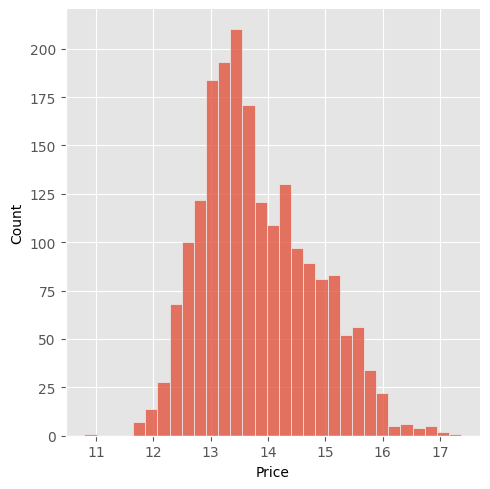

In [337]:
df["Price"] = np.log(df["Price"])
sns.displot(df, x="Price")

In [351]:
X1 = df.drop('Price', axis = 1)
Y1 = df[['Price']]

def min_max_function(features, target):
    scaler1 = MinMaxScaler()
    scaler2 = MinMaxScaler()

    scale_columns1 = features.columns
    scale_columns2 = target.columns

    features[scale_columns1] = scaler1.fit_transform(features[scale_columns1])
    target[scale_columns2] = scaler2.fit_transform(target[scale_columns2])

min_max_function(X1, Y1)

In [341]:
LR1_error, LR1_R2 = linear_regression(X1, Y1)
print("LR: Error : " + str(LR1_error) + " & R^2 : " + str(LR1_R2))

SVM1_error, SVM1_R2 = svm_regression(X1, Y1)
print("SVM: Error : " + str(SVM1_error) + " & R^2 : " + str(SVM1_R2))

KNN1_error, KNN1_R2 = knn_regression(X1, Y1)
print("KNN: Error : " + str(KNN1_error) + " & R^2 : " + str(KNN1_R2))

DT1_error, DT1_R2 = dt_regression(X1, Y1)
print("DT: Error : " + str(DT1_error) + " & R^2 : " + str(DT1_R2))

RF1_error, RF1_R2 = RF_regression(X1, Y1)
print("RF: Error : " + str(RF1_error) + " & R^2 : " + str(RF1_R2))

GB1_error, GB1_R2 = GB_regression(X1, Y1)
print("GB: Error : " + str(GB1_error) + " & R^2 : " + str(GB1_R2))

XGB1_error, XGB1_R2 = XGB_regression(X1, Y1)
print("XGB: Error : " + str(XGB1_error) + " & R^2 : " + str(XGB1_R2))

ADA1_error, ADA1_R2 = ADA_regression(X1, Y1)
print("ADA: Error : " + str(ADA1_error) + " & R^2 : " + str(ADA1_R2))

LR: Error : -0.038 & R^2 : 0.878
SVM: Error : -0.024 & R^2 : 0.944
KNN: Error : -0.04 & R^2 : 0.859
DT: Error : -0.029 & R^2 : 0.913
RF: Error : -0.023 & R^2 : 0.947
GB: Error : -0.025 & R^2 : 0.942
XGB: Error : -0.021 & R^2 : 0.957
ADA: Error : -0.039 & R^2 : 0.878


## Feature selection using correlation matrix

<Axes: >

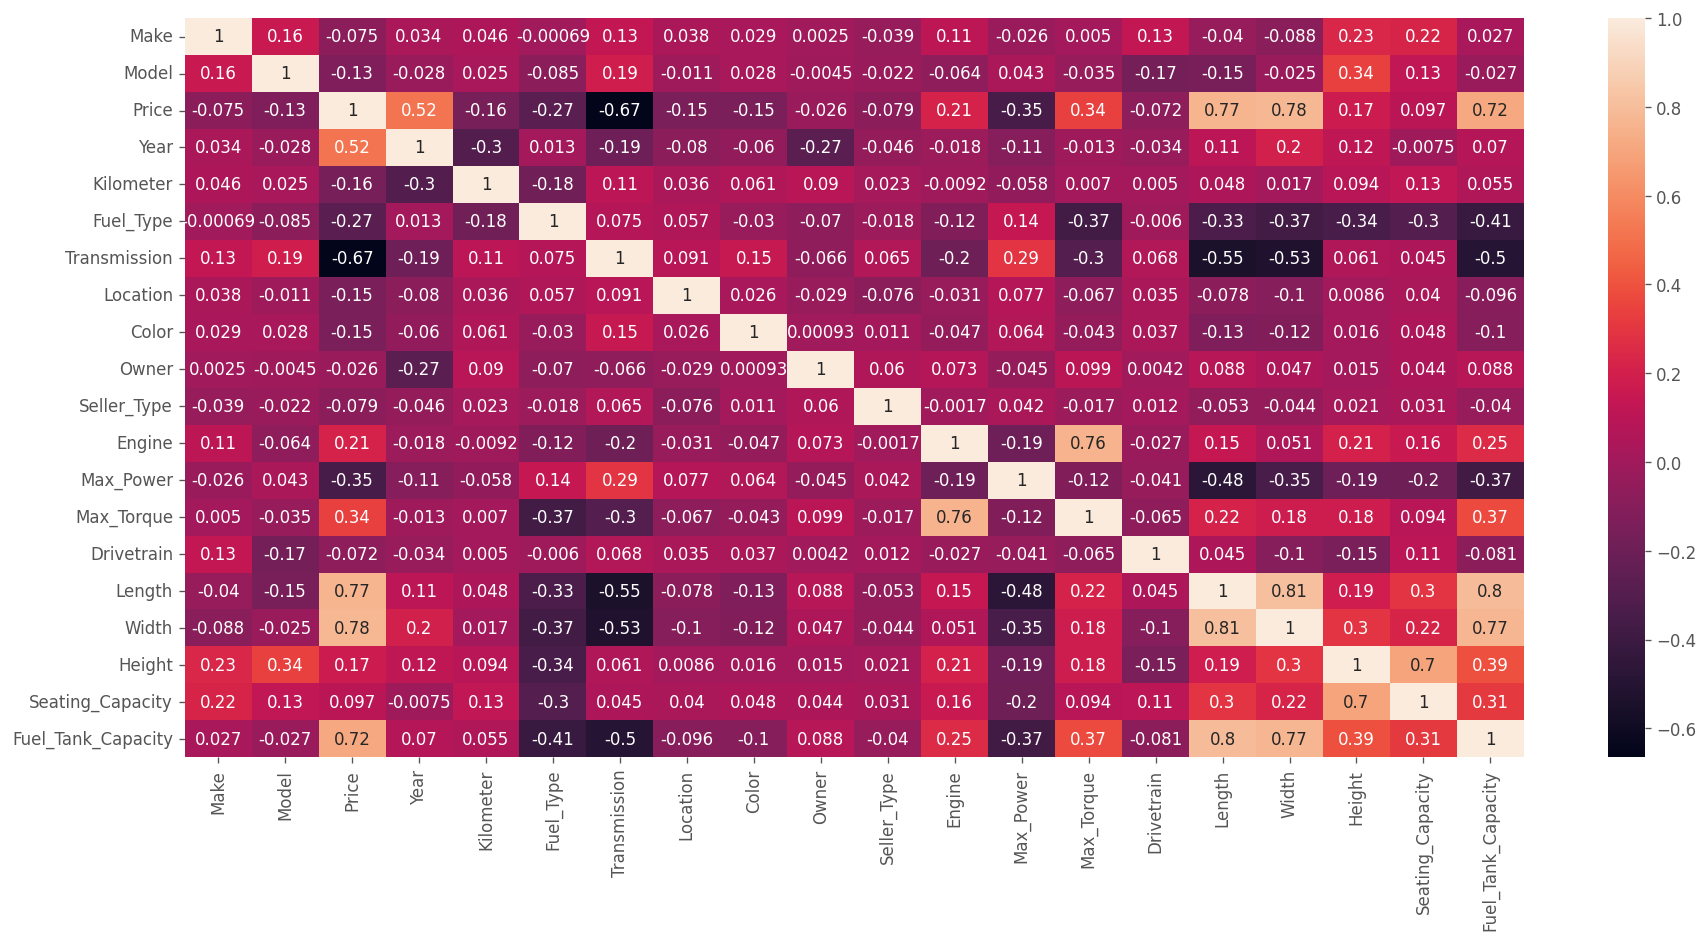

In [348]:
plt.figure(figsize = (18,8), dpi = 120)
sns.heatmap(df.corr(), annot = True)

In [349]:
X2 = X1.drop('Make', axis = 1)
X2 = X2.drop('Owner', axis = 1)
X2 = X2.drop('Seller_Type', axis = 1)
X2 = X2.drop('Drivetrain', axis = 1)
X2 = X2.drop('Seating_Capacity', axis = 1)

In [350]:
LR2_error, LR2_R2 = linear_regression(X2, Y1)
print("LR: Error : " + str(LR2_error) + " & R^2 : " + str(LR2_R2))

SVM2_error, SVM2_R2 = svm_regression(X2, Y1)
print("SVM: Error : " + str(SVM2_error) + " & R^2 : " + str(SVM2_R2))

KNN2_error, KNN2_R2 = knn_regression(X2, Y1)
print("KNN: Error : " + str(KNN2_error) + " & R^2 : " + str(KNN2_R2))

DT2_error, DT2_R2 = dt_regression(X2, Y1)
print("DT: Error : " + str(DT2_error) + " & R^2 : " + str(DT2_R2))

RF2_error, RF2_R2 = RF_regression(X2, Y1)
print("RF: Error : " + str(RF2_error) + " & R^2 : " + str(RF2_R2))

GB2_error, GB2_R2 = GB_regression(X2, Y1)
print("GB: Error : " + str(GB2_error) + " & R^2 : " + str(GB2_R2))

XGB2_error, XGB2_R2 = XGB_regression(X2, Y1)
print("XGB: Error : " + str(XGB2_error) + " & R^2 : " + str(XGB2_R2))

ADA2_error, ADA2_R2 = ADA_regression(X2, Y1)
print("ADA: Error : " + str(ADA2_error) + " & R^2 : " + str(ADA2_R2))

LR: Error : -0.038 & R^2 : 0.874
SVM: Error : -0.025 & R^2 : 0.937
KNN: Error : -0.038 & R^2 : 0.873
DT: Error : -0.029 & R^2 : 0.917
RF: Error : -0.023 & R^2 : 0.948
GB: Error : -0.025 & R^2 : 0.941
XGB: Error : -0.021 & R^2 : 0.956
ADA: Error : -0.039 & R^2 : 0.879


### Feature selection using Lasso regularization

In [352]:
## Finding best value for alpha for Lasso regularization

# parameters to be tested on GridSearchCV
params = {"alpha":np.linspace(1e-5, 10, num = 500)}

# Initializing the Model
lasso_model = Lasso()

# GridSearchCV with model, params and folds.
lasso_grid = GridSearchCV(lasso_model, param_grid = params, cv = folds)
lasso_grid.fit(X1, Y1)
print(lasso_grid.best_params_)

{'alpha': 1e-05}


In [353]:
names=X1.columns
print("Column Names: {}".format(names.values))

Column Names: ['Make' 'Model' 'Year' 'Kilometer' 'Fuel_Type' 'Transmission' 'Location'
 'Color' 'Owner' 'Seller_Type' 'Engine' 'Max_Power' 'Max_Torque'
 'Drivetrain' 'Length' 'Width' 'Height' 'Seating_Capacity'
 'Fuel_Tank_Capacity']


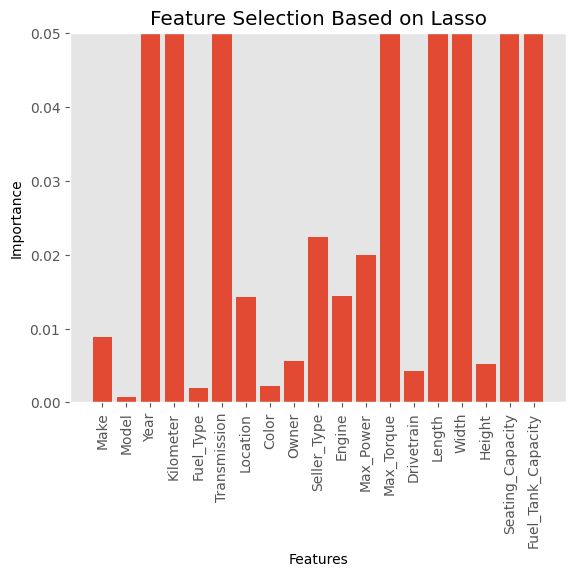

In [354]:
# calling the model with the best parameter
lasso_model = Lasso(alpha = 1e-05)
lasso_model.fit(X1, Y1)

# Using np.abs() to make coefficients positive.  
lasso_coef = np.abs(lasso_model.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.05)
plt.show()

In [365]:
X2 = X1.drop('Model', axis = 1)
X2 = X2.drop('Fuel_Type', axis = 1)
X2 = X2.drop('Color', axis = 1)
X2 = X2.drop('Drivetrain', axis = 1)

In [361]:
LR3_error, LR3_R2 = linear_regression(X2, Y1)
print("LR: Error : " + str(LR3_error) + " & R^2 : " + str(LR3_R2))

SVM3_error, SVM3_R2 = svm_regression(X2, Y1)
print("SVM: Error : " + str(SVM3_error) + " & R^2 : " + str(SVM3_R2))

KNN3_error, KNN3_R2 = knn_regression(X2, Y1)
print("KNN: Error : " + str(KNN3_error) + " & R^2 : " + str(KNN3_R2))

DT3_error, DT3_R2 = dt_regression(X2, Y1)
print("DT: Error : " + str(DT3_error) + " & R^2 : " + str(DT3_R2))

RF3_error, RF3_R2 = RF_regression(X2, Y1)
print("RF: Error : " + str(RF3_error) + " & R^2 : " + str(RF3_R2))

GB3_error, GB3_R2 = GB_regression(X2, Y1)
print("GB: Error : " + str(GB3_error) + " & R^2 : " + str(GB3_R2))

XGB3_error, XGB3_R2 = XGB_regression(X2, Y1)
print("XGB: Error : " + str(XGB3_error) + " & R^2 : " + str(XGB3_R2))

ADA3_error, ADA3_R2 = ADA_regression(X2, Y1)
print("ADA: Error : " + str(ADA3_error) + " & R^2 : " + str(ADA3_R2))

LR: Error : -0.038 & R^2 : 0.879
SVM: Error : -0.024 & R^2 : 0.946
KNN: Error : -0.034 & R^2 : 0.894
DT: Error : -0.03 & R^2 : 0.911
RF: Error : -0.023 & R^2 : 0.947
GB: Error : -0.025 & R^2 : 0.942
XGB: Error : -0.021 & R^2 : 0.958
ADA: Error : -0.039 & R^2 : 0.877


### Neurals Nets

In [73]:
import keras.backend as K

def R_squared(y_true, y_pred):
    sum_squares_residuals = K.sum((y_true - y_pred) ** 2)
    sum_squares = K.sum((y_true - K.mean(y_true)) ** 2)
    R2 = 1 - sum_squares_residuals / sum_squares
    return R2

### Hyper parameter tuning for Neural Networks

#### Batch size and number of epochs tuning 

In [366]:
X2.shape

(1995, 15)

In [371]:
def model_arch():
    with tf.device('/cpu:0'):
        grid_model = tf.keras.models.Sequential()
        grid_model.add(Dense(60, input_dim = 15, activation = 'relu'))
        
        grid_model.add(Dense(1, activation = 'linear'))
        
        grid_model.compile(optimizer = Adam(), loss = 'mae')
        
        return grid_model

In [372]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

grid_model = KerasRegressor(model = model_arch, verbose = 0, epochs = 100, callbacks = callback)

batch_size = [10, 16, 32, 64, 128]
params = {'batch_size': batch_size}

grid = GridSearchCV(estimator = grid_model, param_grid = params, cv = 5)
grid_result = grid.fit(X2, Y1)

print(grid_result.best_score_, grid_result.best_params_)

0.90773528199024 {'batch_size': 10}


#### Activation function and optimizer tuning

In [373]:
def model_arch(hidden_activation = 'relu', output_activation = 'linear', optimizer = Adam()):
    with tf.device('/cpu:0'):
        grid_model = tf.keras.models.Sequential()
        grid_model.add(Dense(60, input_dim = 15, activation = hidden_activation))
        
        grid_model.add(Dense(1, activation = output_activation))
        
        grid_model.compile(optimizer = optimizer, loss = 'mae')
        
        return grid_model

In [374]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

grid_model = KerasRegressor(model = model_arch, epochs = 100, batch_size = 10, callbacks = callback, verbose = 0)

optimizer = ['SGD', 'RMSprop','Adam']
hidden_activation = ['relu', 'linear']
output_activation = ['sigmoid', 'linear']
params = {'model__optimizer': optimizer, 'model__hidden_activation':hidden_activation,
          'model__output_activation':output_activation}

grid = GridSearchCV(estimator = grid_model, param_grid = params, cv = 5)
grid_result = grid.fit(X2, Y1)

print(grid_result.best_score_, grid_result.best_params_)

0.9199739367504497 {'model__hidden_activation': 'relu', 'model__optimizer': 'Adam', 'model__output_activation': 'sigmoid'}


#### Learning rate tuning

In [377]:
def model_arch(learning_rate = 0.01):
    with tf.device('/cpu:0'):
        grid_model = tf.keras.models.Sequential()
        grid_model.add(Dense(60, input_dim = 15, activation = 'relu'))
        
        grid_model.add(Dense(1, activation = 'sigmoid'))
        
        grid_model.compile(optimizer = Adam(learning_rate = learning_rate), loss = 'mae')
        
        return grid_model

In [378]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

grid_model = KerasRegressor(model = model_arch, epochs = 100, batch_size = 10, callbacks = callback, verbose = 0)

learning_rate = [0.0001, 0.0005, 0.001, 0.05, 0.1]
#momentum = [0.0, 0.1, 0.2, 0.4, 0.6]
params = {'model__learning_rate': learning_rate}

grid = GridSearchCV(estimator = grid_model, param_grid = params, cv = 5)
grid_result = grid.fit(X2, Y1)

print(grid_result.best_score_, grid_result.best_params_)

0.9196222288300072 {'model__learning_rate': 0.001}


#### Tune number of neurons

In [379]:
def model_arch(neurons = 19):
    with tf.device('/cpu:0'):
        grid_model = tf.keras.models.Sequential()
        grid_model.add(Dense(units = neurons, input_dim = 15, activation = 'relu'))
        
        grid_model.add(Dense(1, activation = 'sigmoid'))
        
        grid_model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mae')
        
        return grid_model

In [380]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

grid_model = KerasRegressor(model = model_arch, epochs = 100, batch_size = 10, callbacks = callback, verbose = 0)

neurons = [19, 38, 57, 76, 95, 128, 190, 256, 512, 1024]
params = {'model__neurons': neurons}

grid = GridSearchCV(estimator = grid_model, param_grid = params, cv = 5)
grid_result = grid.fit(X2, Y1)

print(grid_result.best_score_, grid_result.best_params_)

0.9259031315921634 {'model__neurons': 190}


#### Tuning Dropout layer

In [381]:
def model_arch(drop = 0.1):
    with tf.device('/cpu:0'):
        grid_model = tf.keras.models.Sequential()
        grid_model.add(Dense(units = 190, input_dim = 15, activation = 'relu'))
        grid_model.add(Dropout(drop))
        
        grid_model.add(Dense(1, activation = 'sigmoid'))
        
        grid_model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mae')
        
        return grid_model

In [382]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

grid_model = KerasRegressor(model = model_arch, epochs = 100, batch_size = 10, callbacks = callback, verbose = 0)

drop = [0, 0.05, 0.1, 0.2, 0.3]
params = {'model__drop': drop}

grid = GridSearchCV(estimator = grid_model, param_grid = params, cv = 5)
grid_result = grid.fit(X2, Y1)

print(grid_result.best_score_, grid_result.best_params_)

0.9219539403390506 {'model__drop': 0.1}


#### Regularization tuning

In [383]:
def model_arch(reg_rate = 0.1):
    with tf.device('/cpu:0'):
        grid_model = tf.keras.models.Sequential()
        grid_model.add(Dense(units = 190, input_dim = 15, activation = 'relu',
                             activity_regularizer = tf.keras.regularizers.L2(l2 = reg_rate)))
        grid_model.add(Dropout(0.1))
        
        grid_model.add(Dense(1, activation = 'sigmoid'))
        
        grid_model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mae')
        
        return grid_model

In [384]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

grid_model = KerasRegressor(model = model_arch, epochs = 100, batch_size = 10, callbacks = callback, verbose = 0)

reg_rate = [0, 0.01, 0.05, 0.1, 0.15, 0.3, 0.4, 0.5]
params = {'model__reg_rate': reg_rate}

grid = GridSearchCV(estimator = grid_model, param_grid = params, cv = 5)
grid_result = grid.fit(X2, Y1)

print(grid_result.best_score_, grid_result.best_params_)

0.9242987471265277 {'model__reg_rate': 0.01}


#### Final model

In [387]:
def model_arch():
    with tf.device('/cpu:0'):
        model = tf.keras.models.Sequential()
        model.add(Dense(units = 190, input_dim = 15, activation = 'relu',
                                activity_regularizer = tf.keras.regularizers.L2(0.01)))
        model.add(Dropout(0.1))
        
        model.add(Dense(1, activation = 'sigmoid'))
        
        model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mae')
    
        return model

In [388]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 8, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'loss',
                                        patience = 3,
                                        factor = 0.5,
                                        min_lr=1e-6,
                                        verbose = 0)

final_model = KerasRegressor(model = model_arch, epochs = 300, batch_size = 10, callbacks = [callback, REDUCE_LR],
                            verbose = 0)


NN_mae, NN_r2 = run_model(final_model, n_folds, X2, Y1)

print('R^2:', NN_r2)
print('MAE:', NN_mae)

Epoch 64: early stopping
Epoch 69: early stopping
Epoch 59: early stopping
Epoch 67: early stopping
Epoch 61: early stopping
Epoch 42: early stopping
Epoch 50: early stopping
Epoch 71: early stopping
Epoch 66: early stopping
R^2: 0.9314341539314321
MAE: -0.026805754638092393


In [389]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X2, Y1, test_size = 0.15, random_state = 2)

print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (1695, 15)
Training Labels Shape :  (1695, 1)
Testing Data Shape    :  (300, 15)
Testing Labels Shape  :  (300, 1)


In [397]:
with tf.device('/cpu:0'):
    model = tf.keras.models.Sequential()
    model.add(Dense(units = 190, input_dim = 15, activation = 'relu',
                    activity_regularizer = tf.keras.regularizers.L2(0.01)))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate = 0.001), loss='mae')

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)

REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                            patience = 3,
                                            factor = 0.5,
                                            min_lr = 1e-6,
                                            verbose = 1)

history = model.fit(x_train, y_train, validation_split = 0.15, epochs=300,
                    batch_size = 10, callbacks=[REDUCE_LR, callback])

Epoch 1/300
144/144 [==============================] - 1s 5ms/step - loss: 0.0812 - val_loss: 0.0563 - lr: 0.0010
Epoch 2/300
144/144 [==============================] - 1s 4ms/step - loss: 0.0542 - val_loss: 0.0463 - lr: 0.0010
Epoch 3/300
144/144 [==============================] - 1s 4ms/step - loss: 0.0472 - val_loss: 0.0424 - lr: 0.0010
Epoch 4/300
144/144 [==============================] - 1s 4ms/step - loss: 0.0433 - val_loss: 0.0390 - lr: 0.0010
Epoch 5/300
144/144 [==============================] - 1s 4ms/step - loss: 0.0407 - val_loss: 0.0377 - lr: 0.0010
Epoch 6/300
144/144 [==============================] - 1s 4ms/step - loss: 0.0397 - val_loss: 0.0384 - lr: 0.0010
Epoch 7/300
144/144 [==============================] - 1s 4ms/step - loss: 0.0376 - val_loss: 0.0327 - lr: 0.0010
Epoch 8/300
144/144 [==============================] - 1s 4ms/step - loss: 0.0364 - val_loss: 0.0387 - lr: 0.0010
Epoch 9/300
144/144 [==============================] - 1s 4ms/step - loss: 0.0363 - val_

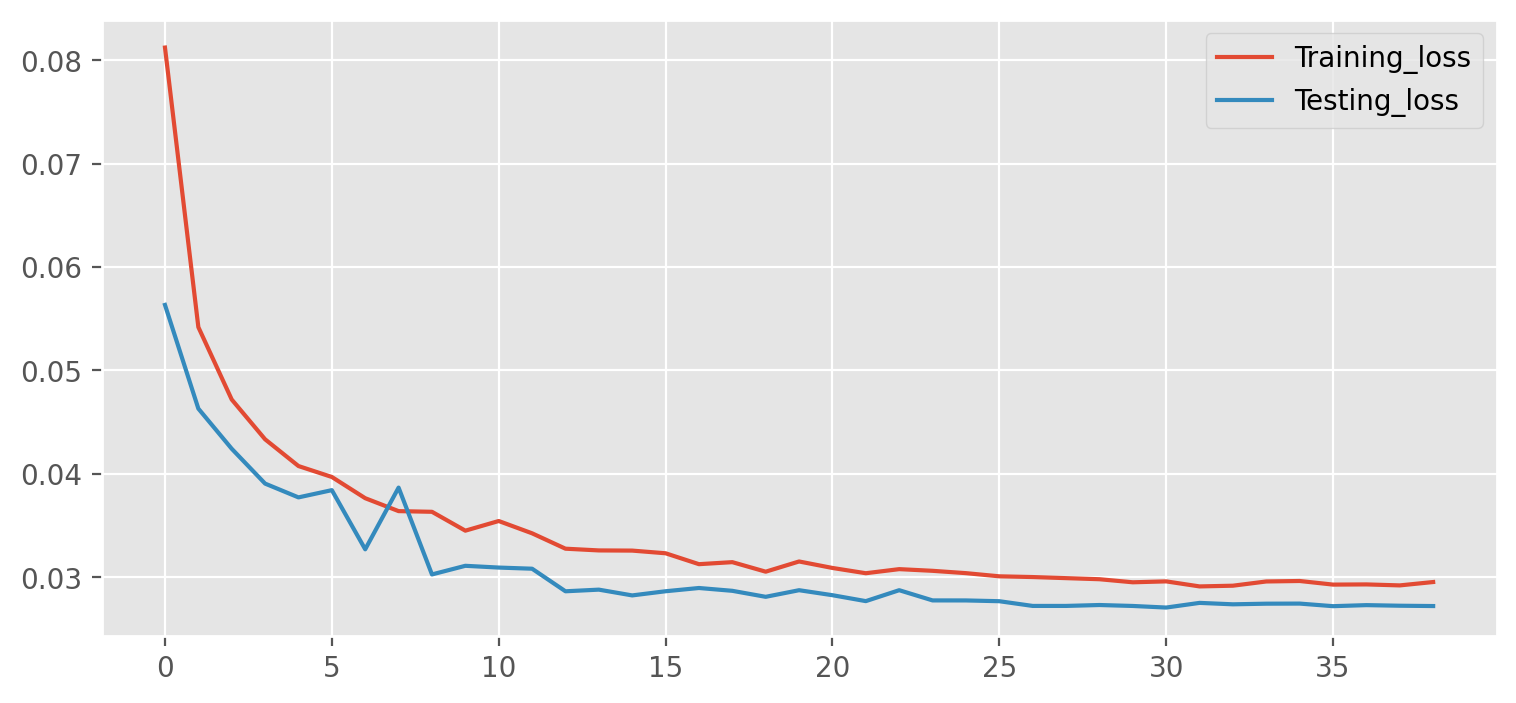

In [398]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']

plt.figure(figsize = (9,4), dpi = 200)
plt.plot(train_loss, label = 'Training_loss')
plt.plot(val_loss, label = 'Testing_loss')
plt.legend()

In [399]:
pred_test = model.predict(x_test)
print(r2_score(y_test, pred_test))

10/10 [==============================] - 0s 2ms/step
0.9257122023310114
